# **Importing Required Libraries**

In [113]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
finviz_url='https://finviz.com/quote.ashx?t='
tickers=['AMZN','AMD','FB']

# **Parsing URL**

In [115]:
news_tables={}

for ticker in tickers:
    url=finviz_url+ticker
    req=Request(url=url,headers={'user-agent':'my-app'})
    response=urlopen(req)
    print(response)
    html=BeautifulSoup(response,'html')
    # print(html)
    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table

In [116]:
# news_tables

# **Storing time, date, ticker and title data into single list**

In [118]:
parsed_data=[]

for ticker,news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title=row.a.text
        date_data=row.td.text.split(" ")
        if len(date_data)==1:
            time=date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
        parsed_data.append([ticker,date,time,title])

In [119]:
# parsed_data

# **Creating DataFrame**

In [120]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
df.head()

,ticker,date,time,title
0,AMZN,Jun-10-22,03:07AM,Amazon Plans to Pull Out of $7.7 Billion Race ...
1,AMZN,Jun-10-22,02:44AM,BOE Says UK Banks Are No Longer Too Big to Fai...
2,AMZN,Jun-10-22,01:51AM,Ukraine Latest: Russian Forces Slam East; Blin...
3,AMZN,Jun-10-22,12:14AM,"Bolsonaro Fears Worst as Writer, Expert Missin..."
4,AMZN,Jun-09-22,08:00PM,Bezos and Ambani Set to Battle Over $7.7 Billi...


In [122]:
df['title']

0      Amazon Plans to Pull Out of $7.7 Billion Race ...
1      BOE Says UK Banks Are No Longer Too Big to Fai...
2      Ukraine Latest: Russian Forces Slam East; Blin...
3      Bolsonaro Fears Worst as Writer, Expert Missin...
4      Bezos and Ambani Set to Battle Over $7.7 Billi...
                             ...                        
295    What Wall Street Thinks About Meta as Sheryl S...
296    Who is Javier Olivan, Meta's new chief operati...
297                  Meta Platforms: Buy, Sell, or Hold?
298    As Sandberg Exits, Is Meta a Sinking Ship or a...
299    Microsoft stock dips, Tesla stock rises, OPEC+...
Name: title, Length: 300, dtype: object

# **Intializing SentimentIntensityAnalyzer**

In [121]:
vader=SentimentIntensityAnalyzer()

# **Finding polarity score for titles in the dataframe**

In [123]:
function=lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(function)
df.head()

,ticker,date,time,title,compound
0,AMZN,Jun-10-22,03:07AM,Amazon Plans to Pull Out of $7.7 Billion Race ...,0.1779
1,AMZN,Jun-10-22,02:44AM,BOE Says UK Banks Are No Longer Too Big to Fai...,-0.6908
2,AMZN,Jun-10-22,01:51AM,Ukraine Latest: Russian Forces Slam East; Blin...,-0.3818
3,AMZN,Jun-10-22,12:14AM,"Bolsonaro Fears Worst as Writer, Expert Missin...",-0.8126
4,AMZN,Jun-09-22,08:00PM,Bezos and Ambani Set to Battle Over $7.7 Billi...,-0.3818


# **Converting string into date time format**

In [124]:
df['date']=pd.to_datetime(df.date).dt.date

# **Visualizing the obtained results**

In [125]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [126]:
mean_df=df.groupby(['ticker','date']).mean()
mean_df

compound
ticker date                
AMD    2022-05-19 -0.103517
       2022-05-20  0.331825
       2022-05-21 -0.341200
       2022-05-23  0.037975
       2022-05-24  0.028600
       2022-05-25 -0.039883
       2022-05-26  0.036300
       2022-05-27 -0.352300
       2022-05-28  0.170000
       2022-05-29  0.510600
       2022-05-30  0.067433
       2022-05-31  0.251675
       2022-06-01  0.330589
       2022-06-02  0.173800
       2022-06-03  0.251745
       2022-06-04  0.101150
       2022-06-05  0.000000
       2022-06-06  0.106975
       2022-06-07  0.292386
       2022-06-08  0.128617
       2022-06-09  0.100467
AMZN   2022-06-07 -0.054944
       2022-06-08  0.157624
       2022-06-09  0.074212
       2022-06-10 -0.426825
FB     2022-06-02  0.101356
       2022-06-03 -0.073100
       2022-06-04 -0.105340
       2022-06-05  0.000000
       2022-06-06  0.221282
       2022-06-07  0.032456
       2022-06-08  0.083895
       2022-06-09 -0.020294
       2022-06-10 -0.510600

In [127]:
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis='columns').transpose()
mean_df

ticker,AMD,AMZN,FB
date,,,
2022-05-19,-0.103517,NaN,NaN
2022-05-20,0.331825,NaN,NaN
2022-05-21,-0.341200,NaN,NaN
2022-05-23,0.037975,NaN,NaN
2022-05-24,0.028600,NaN,NaN
2022-05-25,-0.039883,NaN,NaN
2022-05-26,0.036300,NaN,NaN
2022-05-27,-0.352300,NaN,NaN
2022-05-28,0.170000,NaN,NaN


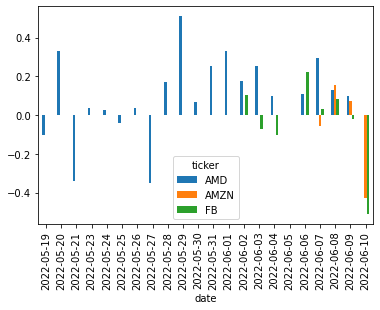

In [128]:
mean_df.plot(kind='bar')
plt.show()